In [1]:
from tensorflow.keras.layers import Dense,Concatenate,Input
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [2]:
init=tf.keras.initializers.he_uniform(seed=5)
checkpoint_filepath='Weights\\best.h5'

In [3]:
def model_ind(input_shape,n_classes):
    inp=keras.Input(shape=input_shape)
    x=Dense(units=64,kernel_initializer=init,activation='relu')(inp)
    x=Dense(units=64,kernel_initializer=init,activation='relu')(x)
    x=Dense(units=input_shape[0])(x)
    
    model=keras.Model(inp,x)
    return model

In [4]:
#importing actual image data and edge image data
df1=pd.read_csv('Datasets\\imageData2_ISL_digits.csv')
df2=pd.read_csv('Datasets\\imageData4_ISL_digits.csv')

In [5]:
df1=df1.iloc[:,1:]
df2=df2.iloc[:,1:]

In [6]:
#creating separate models for original and edge image
n_classes_1=len(np.unique(df1.iloc[:,-1]))
n_classes_2=len(np.unique(df2.iloc[:,-1]))
shape_1=(df1.shape[1]-1,)
shape_2=(df2.shape[1]-1,)
m_1=model_ind(shape_1,n_classes_1)
m_2=model_ind(shape_2,n_classes_2)

In [7]:
input_1=keras.Input(shape=shape_1)
input_2=keras.Input(shape=shape_2)
out_1=m_1(input_1)
out_2=m_2(input_2)

In [8]:
#combining both models
concat=Concatenate()([out_1,out_2])
x=Dense(units=64,kernel_initializer=init,activation='relu')(concat)
x=Dense(units=64,kernel_initializer=init,activation='relu')(concat)
x=Dense(units=n_classes_1,activation='softmax')(x)

model=keras.Model([input_1,input_2],x)

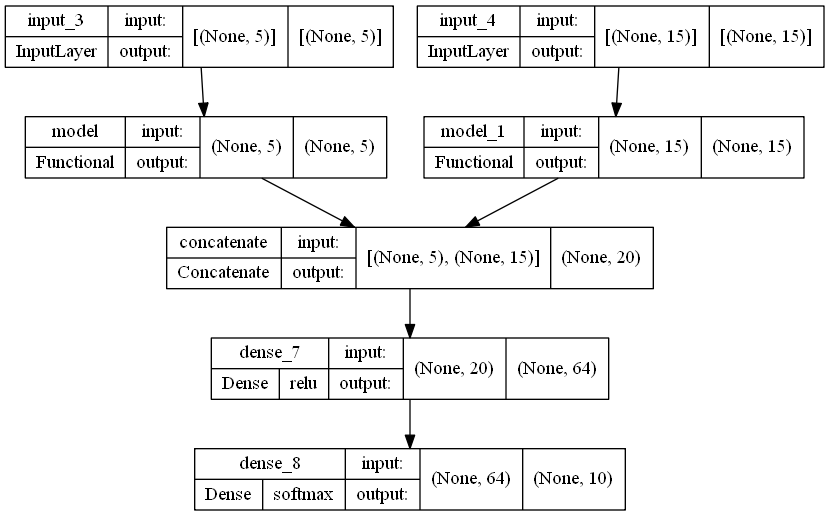

In [9]:
tf.keras.utils.plot_model(model,show_shapes=True,
    show_layer_names=True,show_layer_activations=True)

In [10]:
df=df1.iloc[:,:-1]
df

,1,2,3,4,5
0,157.965565,50.832616,-13.774531,11.089309,0.344090
1,145.852389,28.802518,14.147676,24.978648,-3.968249
2,127.839916,38.386780,25.919354,2.440216,-8.585275
3,123.908750,39.834636,28.925004,0.275715,-6.024300
4,123.210412,42.099222,30.985886,-1.827598,-5.546304
...,...,...,...,...,...
1995,-54.861317,-6.724860,45.494791,-25.262635,25.942447
1996,-51.616531,-10.054179,32.645218,-23.054839,16.474382
1997,-53.489614,-9.995119,36.369633,-25.028293,17.538355
1998,-56.583893,-7.451987,39.576413,-25.141017,19.600593


In [11]:
for i in range(5,5+df2.shape[1]):
    l=list(df2.iloc[:,i-5])
    df[str(i+1)]=l
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,157.965565,50.832616,-13.774531,11.089309,0.344090,18.371453,-26.159988,-13.669088,11.161137,-9.870716,...,-4.367336,5.321274,14.611309,3.828114,8.020978,3.118857,-8.740641,4.039602,1.222851,0
1,145.852389,28.802518,14.147676,24.978648,-3.968249,-11.881391,-19.424495,-10.287336,-23.766995,-13.815121,...,-13.861735,-11.158043,5.765667,-7.998188,11.605020,6.345434,0.804032,-3.576463,1.874400,0
2,127.839916,38.386780,25.919354,2.440216,-8.585275,-10.127525,-18.913267,-11.722607,-23.413286,-15.941862,...,-12.907744,-9.938695,5.604700,-4.380099,8.717772,6.914161,0.484349,-5.974343,-0.153180,0
3,123.908750,39.834636,28.925004,0.275715,-6.024300,-12.954661,-17.603219,-10.977890,-24.436093,-14.334344,...,-12.449311,-11.021588,5.676300,-6.202578,8.533963,8.460811,-0.550979,-5.778258,-0.942473,0
4,123.210412,42.099222,30.985886,-1.827598,-5.546304,-16.280763,-20.215284,-10.922272,-24.754021,-14.937436,...,-11.666813,-11.672299,4.547844,-5.037739,6.625512,8.052855,0.752517,-5.927683,-0.144286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-54.861317,-6.724860,45.494791,-25.262635,25.942447,19.737685,21.522232,25.160959,-2.492401,18.134153,...,14.254563,-7.428742,18.531224,-9.466391,-3.149961,-12.403126,-0.993720,-7.551657,4.475002,9
1996,-51.616531,-10.054179,32.645218,-23.054839,16.474382,15.263458,21.663113,33.789527,-14.089199,7.930802,...,-14.839473,-0.599201,23.491947,5.732535,-11.373857,0.672846,-5.945670,7.305943,2.227791,9
1997,-53.489614,-9.995119,36.369633,-25.028293,17.538355,14.673740,24.612168,29.923620,-9.447322,19.628151,...,-5.283482,8.292310,22.861440,2.538876,-13.800158,-8.550936,-7.059660,1.464636,5.711225,9
1998,-56.583893,-7.451987,39.576413,-25.141017,19.600593,13.109479,16.395235,26.634589,-5.052906,20.240862,...,-11.071390,3.559909,22.756656,-6.077148,-11.273712,-10.862993,-5.661705,0.836903,-7.421506,9


In [12]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=250/df.shape[0], random_state=42)

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
le=LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = np_utils.to_categorical(y_train)

In [15]:
y_test = le.transform(y_test)
y_test = np_utils.to_categorical(y_test)

In [16]:
#ISL digits
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)]
history=model.fit([X_train.iloc[:,:5],X_train.iloc[:,5:]],y_train,validation_data=([X_test.iloc[:,:5],X_test.iloc[:,5:]],y_test),batch_size=5,epochs=300,callbacks=callbacks)

Epoch 1/300
350/350 [==============================] - 7s 9ms/step - loss: 2.8269 - accuracy: 0.8154 - val_loss: 0.3028 - val_accuracy: 0.9520
Epoch 2/300
350/350 [==============================] - 3s 7ms/step - loss: 0.2356 - accuracy: 0.9566 - val_loss: 0.0846 - val_accuracy: 0.9760
Epoch 3/300
350/350 [==============================] - 3s 8ms/step - loss: 0.1321 - accuracy: 0.9771 - val_loss: 0.0351 - val_accuracy: 0.9880
Epoch 4/300
350/350 [==============================] - 2s 7ms/step - loss: 0.1182 - accuracy: 0.9829 - val_loss: 0.0299 - val_accuracy: 0.9920
Epoch 5/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0875 - accuracy: 0.9851 - val_loss: 0.0551 - val_accuracy: 0.9920
Epoch 6/300
350/350 [==============================] - 3s 7ms/step - loss: 0.1311 - accuracy: 0.9789 - val_loss: 0.5605 - val_accuracy: 0.9360
Epoch 7/300
350/350 [==============================] - 3s 7ms/step - loss: 0.1129 - accuracy: 0.9857 - val_loss: 0.0665 - val_accuracy: 0.9880

350/350 [==============================] - 2s 7ms/step - loss: 2.2956e-08 - accuracy: 1.0000 - val_loss: 2.9961e-04 - val_accuracy: 1.0000
Epoch 57/300
350/350 [==============================] - 2s 7ms/step - loss: 1.9618e-08 - accuracy: 1.0000 - val_loss: 3.1125e-04 - val_accuracy: 1.0000
Epoch 58/300
350/350 [==============================] - 2s 7ms/step - loss: 1.7439e-08 - accuracy: 1.0000 - val_loss: 2.5984e-04 - val_accuracy: 1.0000
Epoch 59/300
350/350 [==============================] - 2s 7ms/step - loss: 1.5123e-08 - accuracy: 1.0000 - val_loss: 2.8803e-04 - val_accuracy: 1.0000
Epoch 60/300
350/350 [==============================] - 2s 7ms/step - loss: 1.2398e-08 - accuracy: 1.0000 - val_loss: 2.8030e-04 - val_accuracy: 1.0000
Epoch 61/300
350/350 [==============================] - 2s 7ms/step - loss: 1.1035e-08 - accuracy: 1.0000 - val_loss: 2.5170e-04 - val_accuracy: 1.0000
Epoch 62/300
350/350 [==============================] - 2s 7ms/step - loss: 9.6730e-09 - accuracy: 1.

350/350 [==============================] - 2s 7ms/step - loss: 1.0136e-07 - accuracy: 1.0000 - val_loss: 3.6429e-07 - val_accuracy: 1.0000
Epoch 111/300
350/350 [==============================] - 2s 7ms/step - loss: 8.7056e-08 - accuracy: 1.0000 - val_loss: 3.2519e-07 - val_accuracy: 1.0000
Epoch 112/300
350/350 [==============================] - 2s 7ms/step - loss: 7.4931e-08 - accuracy: 1.0000 - val_loss: 2.8991e-07 - val_accuracy: 1.0000
Epoch 113/300
350/350 [==============================] - 2s 7ms/step - loss: 6.4305e-08 - accuracy: 1.0000 - val_loss: 2.5748e-07 - val_accuracy: 1.0000
Epoch 114/300
350/350 [==============================] - 2s 7ms/step - loss: 5.4904e-08 - accuracy: 1.0000 - val_loss: 2.2983e-07 - val_accuracy: 1.0000
Epoch 115/300
350/350 [==============================] - 2s 7ms/step - loss: 4.6798e-08 - accuracy: 1.0000 - val_loss: 2.0265e-07 - val_accuracy: 1.0000
Epoch 116/300
350/350 [==============================] - 2s 7ms/step - loss: 3.9850e-08 - accura

350/350 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.7643e-08 - val_accuracy: 1.0000
Epoch 164/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.9550e-08 - val_accuracy: 1.0000
Epoch 165/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.1458e-08 - val_accuracy: 1.0000
Epoch 166/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.3842e-08 - val_accuracy: 1.0000
Epoch 167/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.5272e-08 - val_accuracy: 1.0000
Epoch 168/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.6703e-08 - val_accuracy: 1.0000
Epoch 169/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accura

350/350 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 6.6300e-06 - val_accuracy: 1.0000
Epoch 217/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.1456e-06 - val_accuracy: 1.0000
Epoch 218/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.6406e-06 - val_accuracy: 1.0000
Epoch 219/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0415e-05 - val_accuracy: 1.0000
Epoch 220/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3882e-05 - val_accuracy: 1.0000
Epoch 221/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.2523e-05 - val_accuracy: 1.0000
Epoch 222/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accura

Epoch 271/300
350/350 [==============================] - 2s 7ms/step - loss: 2.7929e-09 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy: 0.9960
Epoch 272/300
350/350 [==============================] - 2s 7ms/step - loss: 2.5204e-09 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 0.9960
Epoch 273/300
350/350 [==============================] - 2s 7ms/step - loss: 2.1798e-09 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 0.9960
Epoch 274/300
350/350 [==============================] - 2s 7ms/step - loss: 1.7711e-09 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 0.9960
Epoch 275/300
350/350 [==============================] - 2s 7ms/step - loss: 1.7030e-09 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9960
Epoch 276/300
350/350 [==============================] - 2s 7ms/step - loss: 1.4305e-09 - accuracy: 1.0000 - val_loss: 0.0180 - val_accuracy: 0.9960
Epoch 277/300
350/350 [==============================] - 2s 7ms/step - loss: 1.3624e-09 - accuracy: 1.0000

In [17]:
model.load_weights(checkpoint_filepath)
model.evaluate([X_test.iloc[:,:5],X_test.iloc[:,5:]],y_test)

8/8 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 1.0000


[0.0038720443844795227, 1.0]

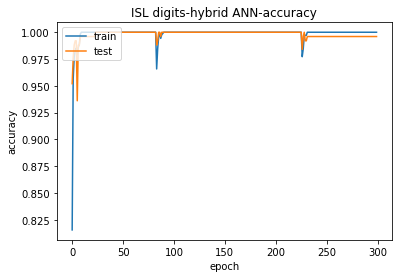

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ISL digits-hybrid ANN-accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

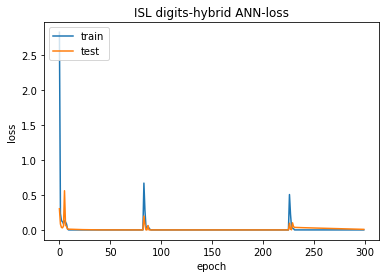

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ISL digits-hybrid ANN-loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()